In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torch

Loading the dsprite dataset from https://github.com/google-deepmind/dsprites-dataset. We are removing the first factor in each of latent values and latent classes because it is redundant. It only encodes the color white for all dsprites in the dataset.

Latent Factors 
- ~~Color: white~~ (removed)
- Shape: square, ellipse, heart
- Scale: 6 values linearly spaced in [0.5, 1]
- Orientation: 40 values in [0, 2 pi]
- Position X: 32 values in [0, 1]
- Position Y: 32 values in [0, 1]


In [45]:
dsprite_dataset = np.load(".\data\dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz")
print("Keys in set: ", dsprite_dataset.keys())
imgs = dsprite_dataset['imgs']
latents_classes = dsprite_dataset['latents_classes'][:, 1:]
latents_values = dsprite_dataset['latents_values'][:, 1:]
print(imgs.shape)
print(latents_classes.shape)
latents_classes

Keys in set:  KeysView(NpzFile '.\\data\\dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz' with keys: metadata, imgs, latents_classes, latents_values)
(737280, 64, 64)
(737280, 5)


array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  2],
       ...,
       [ 2,  5, 39, 31, 29],
       [ 2,  5, 39, 31, 30],
       [ 2,  5, 39, 31, 31]], dtype=int64)

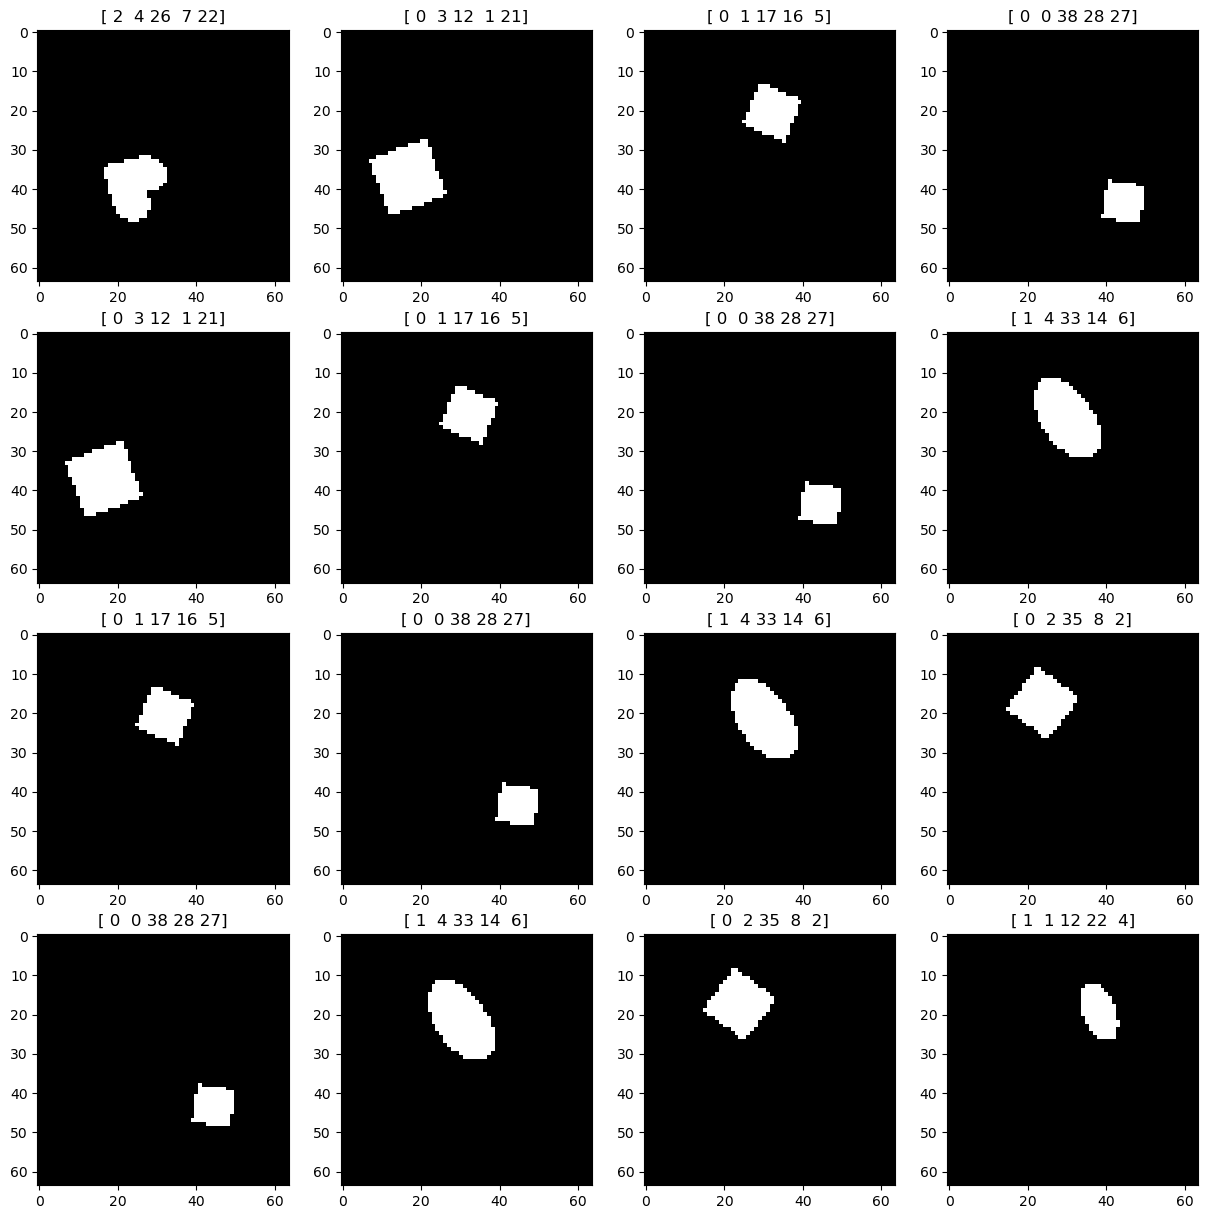

In [38]:
fig, ax = plt.subplots(4, 4, figsize=(15,15))
random_idx = np.random.randint(0, len(imgs), len(ax) * len(ax[0]))
for i in range(len(ax)):
    for j in range(len(ax[0])):
        ax[i][j].imshow(imgs[random_idx[i+j]], cmap="Greys_r", interpolation='nearest')
        ax[i][j].set_title(latents_classes[random_idx[i+j]])


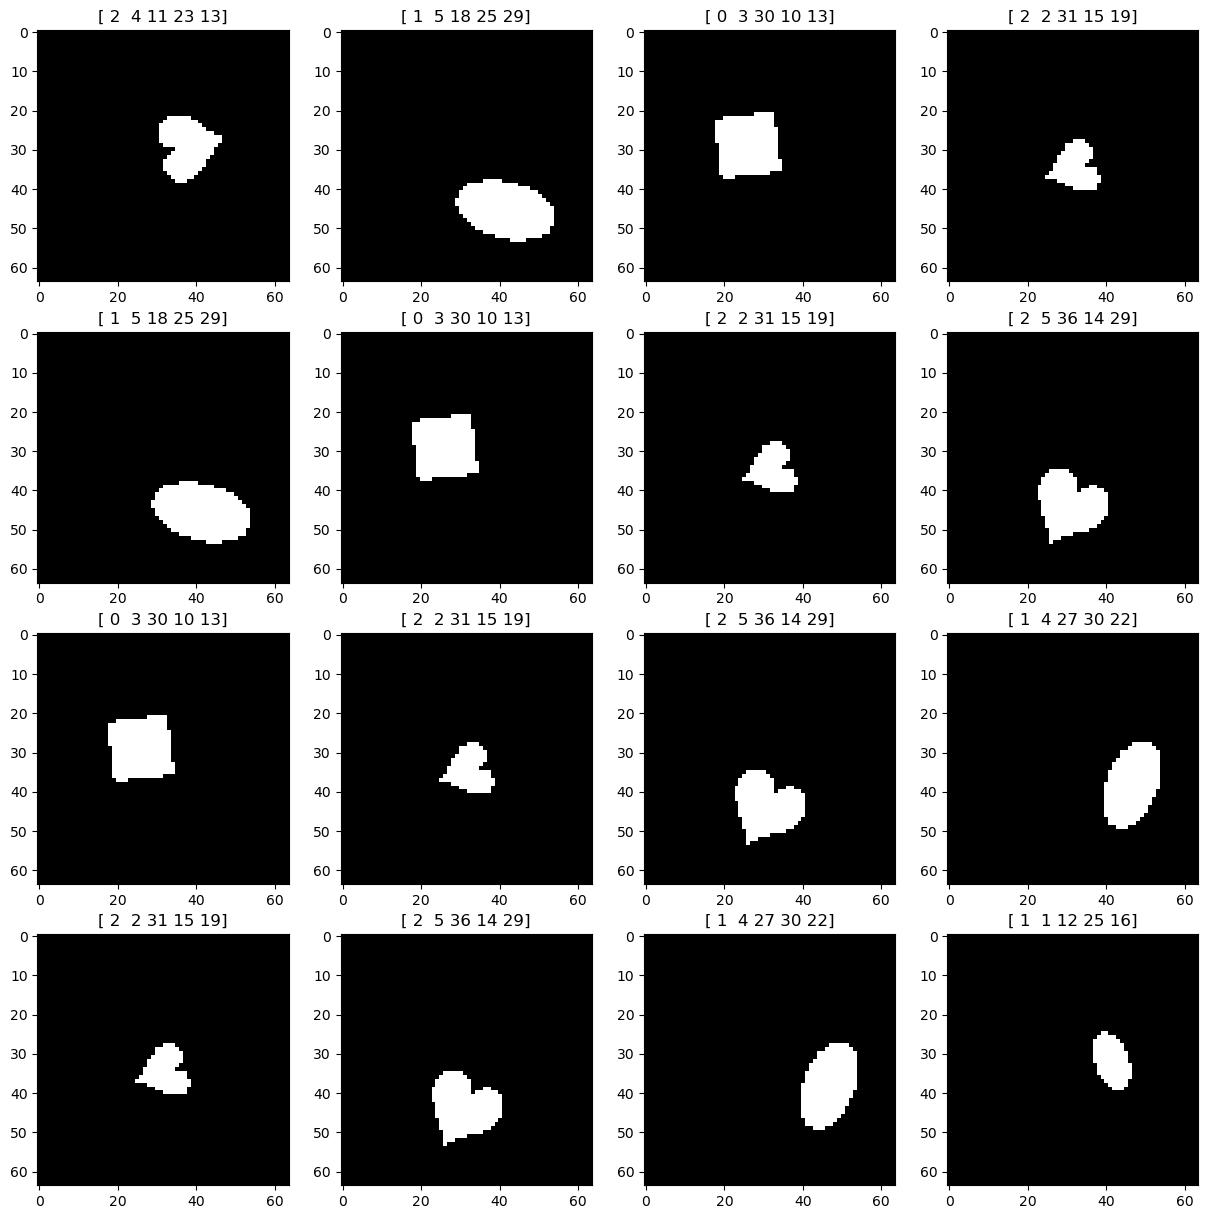

In [60]:
training_split = 0.7
# indices = np.array([i for i in range(len(imgs))])
indices = np.random.permutation(imgs.shape[0])
train_idx, test_idx = indices[:int(np.ceil(indices.shape[0]*training_split))], indices[int(np.ceil(indices.shape[0]*training_split)):]

train_imgs = imgs[train_idx]
test_imgs = imgs[test_idx]
train_classes = latents_classes[train_idx]
test_classes = latents_classes[test_idx]

fig, ax = plt.subplots(4, 4, figsize=(15,15))

for i in range(len(ax)):
    for j in range(len(ax[0])):
        ax[i][j].imshow(train_imgs[i+j], cmap="Greys_r", interpolation='nearest')
        ax[i][j].set_title(train_classes[i+j])

In [ ]:
class dspriteCNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        pass